<a href="https://colab.research.google.com/github/idowujames/-Kenya-Clinical-Reasoning-Challenge/blob/main/Kenya_Clinical_Reasoning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rouge-score --quiet

  Preparing metadata (setup.py) ... done


In [2]:
!pip install wordcloud --quiet

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re

import nltk

# For evaluation
from rouge_score import rouge_scorer

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
df= pd.read_csv('train.csv')

In [6]:
df.shape

(400, 12)

In [7]:
df.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED
0,ID_VBWWP,uasin gishu,sub county hospitals and nursing homes,18.0,i am a nurse with 18 years of experience in ge...,pediatric emergency burns,surgery,summary a 4 year old with 5 superficial burns ...,given your vast experience as a nurse in uasin...,1 immediate treatment protocol for second degr...,here s a response addressing the questions reg...,288514009 burn involving 5 percent of body sur...
1,ID_XMBBY,uasin gishu,national referral hospitals,17.0,i am a nurse with 17 years of experience in ge...,child health,paediatrics,summary 6 year old present with vomiting and a...,clinical summary • a 6 year old girl with know...,based on the symptoms and signs you ve describ...,based on the presentation the 6 year old girl ...,420270002 ketoacidosis due to type 1 diabetes ...
2,ID_JZNZW,kiambu,sub county hospitals and nursing homes,12.0,i am a nurse with 12 years of experience in ge...,general emergency,internal medicine,summary a 47 year old man presents with severe...,in this case you re dealing with a 47 year old...,firstly i must commend you on your thorough hi...,this 47 year old male presenting with severe r...,13200003 peptic ulcer disorder 25458004 acute ...
3,ID_QOQTK,uasin gishu,national referral hospitals,12.0,i am a nurse with 12 years of experience in pr...,critical care,internal medicine,summary 72 year old female with inability to w...,given er s clinical presentation and vitals th...,to me with this query based on the information...,this 92 year old female patient er presents wi...,14760008 constipation finding 419284004 altere...
4,ID_ZFJBM,uasin gishu,national referral hospitals,16.0,i am a nurse with 16 years of experience in ge...,adult health,internal medicine,a 22 year old female presents with headache di...,the 22 year old female patient is presenting w...,thank you for presenting this case based on th...,this 22 year old female patient presents with ...,95874006 carbon monoxide poisoning from fire d...


In [8]:
df.sample(5)

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED
239,ID_XPSWT,kakamega,sub county hospitals and nursing homes,7.0,i am a nurse with 7 years of experience in gen...,maternal and child health,obstetrics and gynaecology,35 year old female po 3g4 now po 4 rhesus nega...,in this situation the patient is dealing with ...,i understand the situation is quite challengin...,this is a serious situation requiring immediat...,271737000 anemia disorder 156073000 complete m...
20,ID_IDJRT,uasin gishu,national referral hospitals,9.0,i am a nurse with 9 years of experience in gen...,neonatal care,paediatrics,summary a neonate admitted to the kangaroo roo...,in the case of the neonate admitted to the kan...,ideal immediate care given the neonate s diffi...,this situation requires immediate action due t...,422588002 aspiration pneumonia disorder 716063...
275,ID_LIESO,kakamega,health centres,NaN,i am a nurse working in a health centres in ka...,surgical care,surgery,summary a 45 year old man with a 2 day history...,the 45 year old man presenting with a distende...,based on the symptoms and examination findings...,this 45 year old man presenting with a rapidly...,1162728008 intestinal obstruction due to stric...
25,ID_OKDQA,uasin gishu,national referral hospitals,NaN,i am a nurse working in a national referral ho...,general emergency,surgery,summary a 70 year old male has difficulty swal...,immediate care the patient is presenting with ...,i d be happy to help immediate care given the ...,this 46 year old female presents with a critic...,363402007 malignant tumor of esophagus disorde...
49,ID_XCCDE,uasin gishu,sub county hospitals and nursing homes,14.0,i am a nurse with 14 years of experience in ge...,adult health,surgery,a 25 year old male with extreme lower abdomina...,the patient’s symptoms including extreme lower...,given the patient s symptoms particularly the ...,the immediate management of a 25 year old male...,710572000 intestinal obstruction co occurrent ...


## EDA

In [34]:
df_train = df.copy()
df_train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED
0,ID_VBWWP,uasin gishu,sub county hospitals and nursing homes,18.0,i am a nurse with 18 years of experience in ge...,pediatric emergency burns,surgery,summary a 4 year old with 5 superficial burns ...,given your vast experience as a nurse in uasin...,1 immediate treatment protocol for second degr...,here s a response addressing the questions reg...,288514009 burn involving 5 percent of body sur...
1,ID_XMBBY,uasin gishu,national referral hospitals,17.0,i am a nurse with 17 years of experience in ge...,child health,paediatrics,summary 6 year old present with vomiting and a...,clinical summary • a 6 year old girl with know...,based on the symptoms and signs you ve describ...,based on the presentation the 6 year old girl ...,420270002 ketoacidosis due to type 1 diabetes ...
2,ID_JZNZW,kiambu,sub county hospitals and nursing homes,12.0,i am a nurse with 12 years of experience in ge...,general emergency,internal medicine,summary a 47 year old man presents with severe...,in this case you re dealing with a 47 year old...,firstly i must commend you on your thorough hi...,this 47 year old male presenting with severe r...,13200003 peptic ulcer disorder 25458004 acute ...
3,ID_QOQTK,uasin gishu,national referral hospitals,12.0,i am a nurse with 12 years of experience in pr...,critical care,internal medicine,summary 72 year old female with inability to w...,given er s clinical presentation and vitals th...,to me with this query based on the information...,this 92 year old female patient er presents wi...,14760008 constipation finding 419284004 altere...
4,ID_ZFJBM,uasin gishu,national referral hospitals,16.0,i am a nurse with 16 years of experience in ge...,adult health,internal medicine,a 22 year old female presents with headache di...,the 22 year old female patient is presenting w...,thank you for presenting this case based on th...,this 22 year old female patient presents with ...,95874006 carbon monoxide poisoning from fire d...


## We will start by focusing on the Prompt column and the clinician columns as they are the most important

In [35]:
# Stripping leading/trailing white-spaces from 'Prompt' and 'Clinician' columns
df_train['Prompt'] = df_train['Prompt'].str.strip()
df_train['Clinician'] = df_train['Clinician'].str.strip()

In [36]:
df_train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED
0,ID_VBWWP,uasin gishu,sub county hospitals and nursing homes,18.0,i am a nurse with 18 years of experience in ge...,pediatric emergency burns,surgery,summary a 4 year old with 5 superficial burns ...,given your vast experience as a nurse in uasin...,1 immediate treatment protocol for second degr...,here s a response addressing the questions reg...,288514009 burn involving 5 percent of body sur...
1,ID_XMBBY,uasin gishu,national referral hospitals,17.0,i am a nurse with 17 years of experience in ge...,child health,paediatrics,summary 6 year old present with vomiting and a...,clinical summary • a 6 year old girl with know...,based on the symptoms and signs you ve describ...,based on the presentation the 6 year old girl ...,420270002 ketoacidosis due to type 1 diabetes ...
2,ID_JZNZW,kiambu,sub county hospitals and nursing homes,12.0,i am a nurse with 12 years of experience in ge...,general emergency,internal medicine,summary a 47 year old man presents with severe...,in this case you re dealing with a 47 year old...,firstly i must commend you on your thorough hi...,this 47 year old male presenting with severe r...,13200003 peptic ulcer disorder 25458004 acute ...
3,ID_QOQTK,uasin gishu,national referral hospitals,12.0,i am a nurse with 12 years of experience in pr...,critical care,internal medicine,summary 72 year old female with inability to w...,given er s clinical presentation and vitals th...,to me with this query based on the information...,this 92 year old female patient er presents wi...,14760008 constipation finding 419284004 altere...
4,ID_ZFJBM,uasin gishu,national referral hospitals,16.0,i am a nurse with 16 years of experience in ge...,adult health,internal medicine,a 22 year old female presents with headache di...,the 22 year old female patient is presenting w...,thank you for presenting this case based on th...,this 22 year old female patient presents with ...,95874006 carbon monoxide poisoning from fire d...


## Getting the number of words in the Prompt column and Clinician Column

In [37]:
# Getting the number of words in the 'Prompt' column
df_train['Prompt_word_count'] = df_train['Prompt'].str.split().str.len()

# Getting the number of words in the 'Clinician' column
df_train['Clinician_word_count'] = df_train['Clinician'].str.split().str.len()


## Descriptive statistics for the count columns

In [38]:
df_train[['Prompt_word_count','Clinician_word_count']].describe()

,Prompt_word_count,Clinician_word_count
count,400.000000,400.000000
mean,99.355000,109.010000
std,27.916883,44.714521
min,41.000000,29.000000
25%,81.750000,76.000000
50%,96.000000,103.000000
75%,111.250000,132.000000
max,252.000000,320.000000


In [39]:
# Getting the row with the longest prompt count
df_train[df_train['Prompt_word_count']== 252]

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED,Prompt_word_count,Clinician_word_count
13,ID_IAYWV,kiambu,dispensaries and private clinics,15.0,i am a nurse with 15 years of experience in ge...,adult health,paediatrics,summary 3 year old male c o severe headache gb...,this case involves a 30 year old male who was ...,i m so sorry to hear that the patient didn t s...,this case presents a tragic situation with sev...,95883001 bacterial meningitis disorder 1423200...,252,165


In [40]:
# Getting the rows with the shortest clinician word count
df_train[df_train['Clinician_word_count']== 29]

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED,Prompt_word_count,Clinician_word_count
73,ID_WEFUI,kakamega,dispensaries and private clinics,NaN,i am a nurse working in a dispensaries and pri...,emergency care gbv,internal medicine,summary a 30 years old woman presents with a h...,in this situation where the woman is experienc...,i m so sorry to hear that this lady is going t...,this is a serious situation requiring a multi ...,706893006 victim of intimate partner abuse fin...,62,29
128,ID_UITQU,uasin gishu,sub county hospitals and nursing homes,8.0,i am a nurse with 8 years of experience in gen...,general emergency,internal medicine,summary a 17 year old presents with a history ...,given the presentation of a 17 year old girl w...,nice to help you with this case thank you for ...,given the limited information several possibil...,91175000 seizure finding 302866003 hypoglycemi...,81,29
243,ID_DDTPK,uasin gishu,health centres,30.0,i am a nurse with 30 years of experience in ge...,general emergency,internal medicine,summary 60 year old patient has retrosternal p...,based on the symptoms and findings you’ve desc...,thank you for reaching out esteemed nurse youp...,given the patient s age 60 years history of lo...,297267009 retrosternal thyroid gland disorder ...,75,29
371,ID_ESQTI,uasin gishu,national referral hospitals,20.0,i am a nurse with 20 years of experience in pr...,sexual and reproductive health,obstetrics and gynaecology,a 32 year old female with a history of pv blee...,per vaginal bleeding in a 32 year old female t...,as a professor of primary healthcare in kenya ...,the differential diagnosis for a 32 year old f...,271737000 anemia disorder 44991000119100 abnor...,71,29


## Visualizing the counts

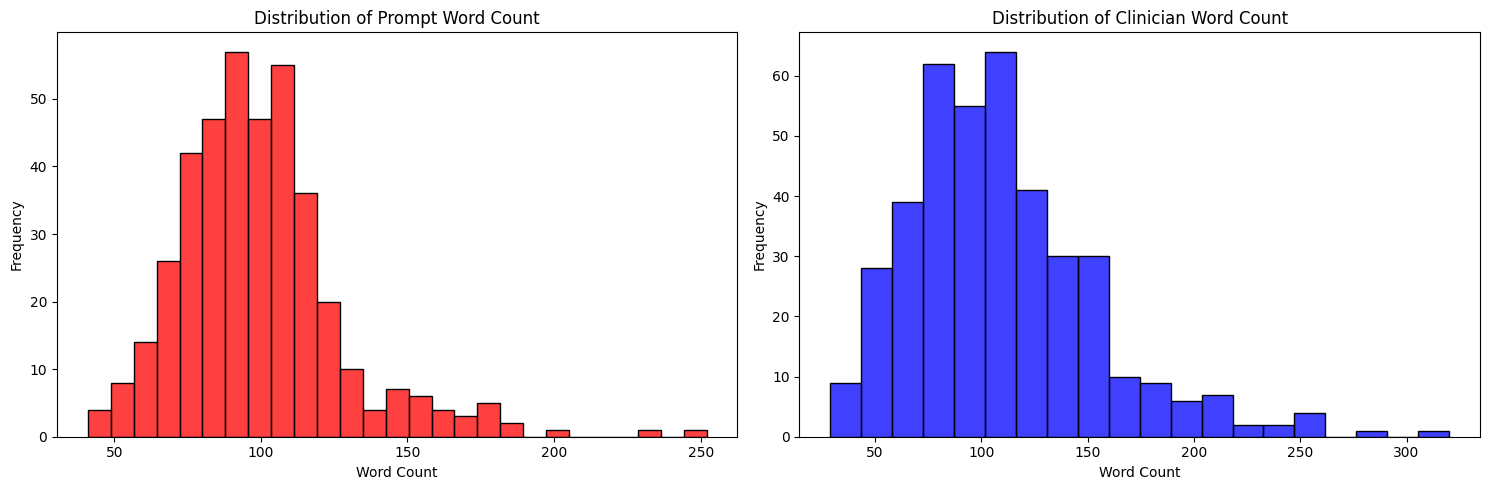

In [41]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_train['Prompt_word_count'], ax=ax1, color='red')
ax1.set_title('Distribution of Prompt Word Count')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')

sns.histplot(df_train['Clinician_word_count'], ax=ax2, color='blue')
ax2.set_title('Distribution of Clinician Word Count')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()



## Getting a word cloud of most common words in Clinician's reponse

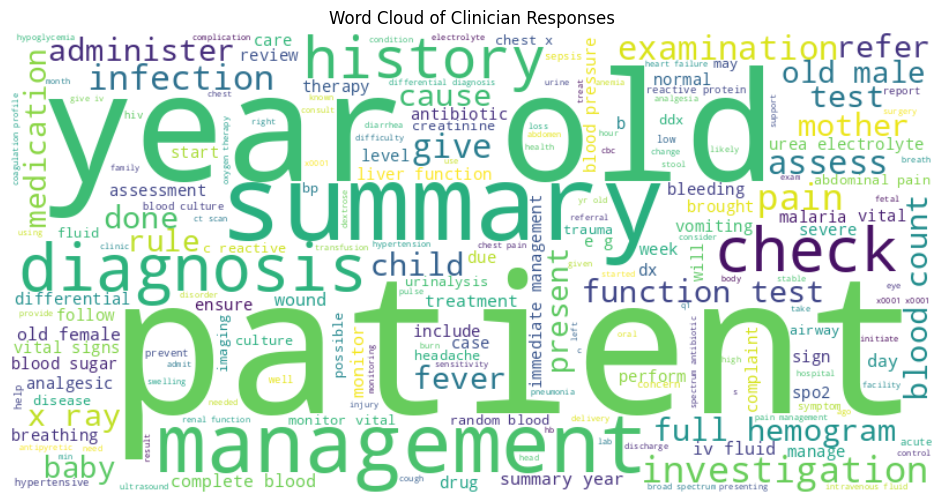

In [42]:
from wordcloud import WordCloud

all_response_text = " ".join(df_train['Clinician'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_response_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clinician Responses')
plt.show()

## Cleaning Errors in Dataset

### Correcting Age Mismatches

### Some entries have significant age difference that need to be corrected. E.g 2yr old to 68 yr old

In [43]:
# The Following entries have significant age mismatch
# 233,3,13,15,39,68,80,95,257,302,355,391

corrections = [
    # index, wrong age, correct age
    (3, "72", "92"),
    (13, "3 year old", "30 year old"),
    (15, "65 year old", "25 year old"),
    (39, "32 year old", "22 year old"),
    (68, "10 year old", "40 year old"),
    (80, "3 year old", "18 year old"),
    (95, "20 year old", "30 year old"),
    (233, "40 year old", "60 year old"),
    (257, "5 year old", "5 month old"),
    (302, "14 year old", "40 year old"),
    (355, "4 year old", "1 year old"),
    (391, "36 year old", "66 year old")
]

for idx, wrong_age, correct_age in corrections:
  df_train.loc[idx, 'Clinician'] = df_train.loc[idx, 'Clinician'].replace(wrong_age, correct_age)

### Removing Entries With Context Mismatche

Some entries have the clinician diagnostics being totally different from the prompt. Removing them because without expert knowledge there's no way of making correction.

In [45]:
# The Following entries have context mismatch
# 81,25,103,136,147,160,266,317,331,351,362,365,370,396

rows_to_drop = [ 81,25,103,136,147,160,266,317,331,351,362,365,370,396]

df_train = df_train.drop(index=rows_to_drop, errors='ignore').reset_index(drop=True)

### Verifying the dataset after cleaning

In [47]:
print (df_train.shape)
df_train.head()

(386, 14)


,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED,Prompt_word_count,Clinician_word_count
0,ID_VBWWP,uasin gishu,sub county hospitals and nursing homes,18.0,i am a nurse with 18 years of experience in ge...,pediatric emergency burns,surgery,summary a 4 year old with 5 superficial burns ...,given your vast experience as a nurse in uasin...,1 immediate treatment protocol for second degr...,here s a response addressing the questions reg...,288514009 burn involving 5 percent of body sur...,158,47
1,ID_XMBBY,uasin gishu,national referral hospitals,17.0,i am a nurse with 17 years of experience in ge...,child health,paediatrics,summary 6 year old present with vomiting and a...,clinical summary • a 6 year old girl with know...,based on the symptoms and signs you ve describ...,based on the presentation the 6 year old girl ...,420270002 ketoacidosis due to type 1 diabetes ...,124,146
2,ID_JZNZW,kiambu,sub county hospitals and nursing homes,12.0,i am a nurse with 12 years of experience in ge...,general emergency,internal medicine,summary a 47 year old man presents with severe...,in this case you re dealing with a 47 year old...,firstly i must commend you on your thorough hi...,this 47 year old male presenting with severe r...,13200003 peptic ulcer disorder 25458004 acute ...,128,111
3,ID_QOQTK,uasin gishu,national referral hospitals,12.0,i am a nurse with 12 years of experience in pr...,critical care,internal medicine,summary 92 year old female with inability to w...,given er s clinical presentation and vitals th...,to me with this query based on the information...,this 92 year old female patient er presents wi...,14760008 constipation finding 419284004 altere...,88,168
4,ID_ZFJBM,uasin gishu,national referral hospitals,16.0,i am a nurse with 16 years of experience in ge...,adult health,internal medicine,a 22 year old female presents with headache di...,the 22 year old female patient is presenting w...,thank you for presenting this case based on th...,this 22 year old female patient presents with ...,95874006 carbon monoxide poisoning from fire d...,110,137


In [48]:
df_train[['Prompt_word_count','Clinician_word_count']].describe()

,Prompt_word_count,Clinician_word_count
count,386.000000,386.000000
mean,99.590674,110.331606
std,27.949273,44.905255
min,41.000000,29.000000
25%,82.000000,78.000000
50%,96.000000,106.000000
75%,112.000000,133.750000
max,252.000000,320.000000


In [50]:
# Saving the cleaned dataset
df_train.to_csv('cleaned_dataset.csv', index=False)